## **Test-1 Part-A**
#### Shrikant_Patane

##### **PLEASE MAKE SURE TO UPLOAD THE sales_dataset.csv TO RUN THE CODE.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df=pd.read_csv(r'/content/sales_dataset.csv')
df.head(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-city           128916 non-nul

In [ ]:
df.describe()

,Qty,Amount,ship-postal-code
count,128949.000000,121155.000000,128916.000000
mean,0.904629,648.550806,463978.298008
std,0.314782,281.218324,191473.322953
min,0.000000,0.000000,110001.000000
25%,1.000000,449.000000,382421.000000
50%,1.000000,605.000000,500033.000000
75%,1.000000,788.000000,600024.000000
max,15.000000,5584.000000,989898.000000


In [ ]:
df.shape

(128949, 23)

In [ ]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6871
Qty                       0
currency               7794
Amount                 7794
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49142
B2B                       0
fulfilled-by          89679
Unnamed: 22           49041
dtype: int64

In [ ]:
df.columns=df.columns.str.strip().str.title().str.replace("-",'').str.replace(" ","_")

In [ ]:
df.columns

Index(['Order_Id', 'Date', 'Status', 'Fulfilment', 'Sales_Channel',
       'ShipServiceLevel', 'Style', 'Sku', 'Category', 'Size', 'Asin',
       'Courier_Status', 'Qty', 'Currency', 'Amount', 'ShipCity', 'ShipState',
       'ShipPostalCode', 'ShipCountry', 'PromotionIds', 'B2B', 'FulfilledBy',
       'Unnamed:_22'],
      dtype='object')

In [ ]:
df.shape

(128949, 23)

In [ ]:
len(df["Order_Id"].unique())

120352

#### 'Order_Id' Must contain unique values but it has some duplicate values

In [ ]:
duplicate=df[df['Order_Id'].duplicated(keep='first')]
df.drop(duplicate.index,axis=0,inplace=True)

In [ ]:
df.shape

(120352, 23)

#### Converting object "Date" column to "Datetime" datatype column

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df['Month']=[i.month for i in df['Date']]
df['Day']=[i.day for i in df['Date']]
df['Weekday']=[i.weekday() for i in df['Date']]

#### we have multiple columns here which contain null values,
#### first we will fill amount null values and Zero values with median of amount column

In [ ]:
df['Amount'].fillna(df['Amount'].sort_values(ascending=False).median(),inplace=True)

In [ ]:
df['Amount'].replace(0,df['Amount'].median(),inplace=True)

In [ ]:
df.isnull().sum()

Order_Id                0
Date                    0
Status                  0
Fulfilment              0
Sales_Channel           0
ShipServiceLevel        0
Style                   0
Sku                     0
Category                0
Size                    0
Asin                    0
Courier_Status       6386
Qty                     0
Currency             7400
Amount                  0
ShipCity               28
ShipState              28
ShipPostalCode         28
ShipCountry            28
PromotionIds        46916
B2B                     0
FulfilledBy         83983
Unnamed:_22         45831
Month                   0
Day                     0
Weekday                 0
dtype: int64

#### Dropping some unncessary columns

In [ ]:
df.drop(['Unnamed:_22','FulfilledBy','PromotionIds'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120352 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_Id          120352 non-null  object        
 1   Date              120352 non-null  datetime64[ns]
 2   Status            120352 non-null  object        
 3   Fulfilment        120352 non-null  object        
 4   Sales_Channel     120352 non-null  object        
 5   ShipServiceLevel  120352 non-null  object        
 6   Style             120352 non-null  object        
 7   Sku               120352 non-null  object        
 8   Category          120352 non-null  object        
 9   Size              120352 non-null  object        
 10  Asin              120352 non-null  object        
 11  Courier_Status    113966 non-null  object        
 12  Qty               120352 non-null  int64         
 13  Currency          112952 non-null  object        
 14  Amou

#### Now lets drop the remaining null values with axis=0

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.shape

(108195, 23)

In [ ]:
df.isnull().sum()

Order_Id            0
Date                0
Status              0
Fulfilment          0
Sales_Channel       0
ShipServiceLevel    0
Style               0
Sku                 0
Category            0
Size                0
Asin                0
Courier_Status      0
Qty                 0
Currency            0
Amount              0
ShipCity            0
ShipState           0
ShipPostalCode      0
ShipCountry         0
B2B                 0
Month               0
Day                 0
Weekday             0
dtype: int64

### **Problem Statement 1**

####  Financial Performance: Enhance financial performance by analyzing total revenue, identifying top-selling products, calculating average order value, and identifying peak sales periods.

#### **Revenuve Generated -**

In [ ]:
print('total_revenue_generated -> ',df['Amount'].sum())

total_revenue_generated ->  71857436.0


#### **Top Selling Product -**

In [ ]:
df['Category'].value_counts().head(1)

Set    42298
Name: Category, dtype: int64

In [ ]:
df['Style'].value_counts().head(1)

JNE3797    3531
Name: Style, dtype: int64

#### **Average Order Value -**

In [ ]:
sum(df['Amount'])/len(df['Order_Id'])

664.1474744673968

#### **Peak Sales Periods -**

In [ ]:
from datetime import datetime

###### Converting Object data type of Date column to Datetime

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108195 entries, 1 to 128948
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_Id          108195 non-null  object        
 1   Date              108195 non-null  datetime64[ns]
 2   Status            108195 non-null  object        
 3   Fulfilment        108195 non-null  object        
 4   Sales_Channel     108195 non-null  object        
 5   ShipServiceLevel  108195 non-null  object        
 6   Style             108195 non-null  object        
 7   Sku               108195 non-null  object        
 8   Category          108195 non-null  object        
 9   Size              108195 non-null  object        
 10  Asin              108195 non-null  object        
 11  Courier_Status    108195 non-null  object        
 12  Qty               108195 non-null  int64         
 13  Currency          108195 non-null  object        
 14  Amou

In [ ]:
df['month']=[i.month for i in df['Date']]

In [ ]:

df['weekday']=[i.weekday() for i in df['Date']]

In [ ]:
df['weekday'].value_counts()

6    16449
1    15786
2    15588
0    15577
5    15558
4    14867
3    14370
Name: weekday, dtype: int64

###### 0-Mon 1-Tue 2-Wed 3-Thurs 4-Fri 5-Sat 6-Sun

#### **6 it is, It means the sales is peak on 6th weekday i.e. sunday**

### **Problem Statement 2**

#### Understand customer behavior by identifying top-performing locations, analyzing order cancellations, and differentiating between B2B and B2C customers.


##### **TOP PERFORMING CITY**

In [ ]:
df['ShipCity'].value_counts().sort_values(ascending=False).head(1)

BENGALURU    9672
Name: ShipCity, dtype: int64

##### **TOP PERFORMING STATE**

In [ ]:
df['ShipState'].value_counts().sort_values(ascending=False).head(1)

MAHARASHTRA    18915
Name: ShipState, dtype: int64

##### **TOP PERFORMING COUNTRY**

In [ ]:
df['ShipCountry'].value_counts().sort_values(ascending=False).head(1)

IN    108195
Name: ShipCountry, dtype: int64

#### **Analyzing Order Cancellations**

In [ ]:
df[df['Status']=='Cancelled']

,Order_Id,Date,Status,Fulfilment,Sales_Channel,ShipServiceLevel,Style,Sku,Category,Size,...,ShipCity,ShipState,ShipPostalCode,ShipCountry,B2B,Month,Day,Weekday,month,weekday
11,171-4638481-6326716,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,JNE3500,JNE3500-KR-XS,kurta,XS,...,NOIDA,UTTAR PRADESH,201303.0,IN,False,4,30,5,4,5
54,171-2592464-6846743,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,NW005,NW005-ST-PJ-XL,Set,XL,...,BENGALURU,KARNATAKA,560023.0,IN,False,4,30,5,4,5
107,403-0104882-7373900,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,JNE3861,JNE3861-DR-XXL,Western Dress,XXL,...,HIMMATNAGAR,Gujarat,383001.0,IN,False,4,30,5,4,5
128,403-5222550-4437140,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,JNE3261,JNE3261-KR-M,kurta,M,...,COIMBATORE,TAMIL NADU,641035.0,IN,False,4,30,5,4,5
142,406-7779874-9136347,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET398,SET398-KR-PP-L,Set,L,...,HERBERTPUR,UTTARAKHAND,248142.0,IN,False,4,30,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128936,408-9803724-6565965,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,MEN5024,MEN5024-KR-L,kurta,L,...,MUMBAI,MAHARASHTRA,400056.0,IN,False,5,31,1,5,1
128938,404-2225394-8024308,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,J0152,J0152-DR-S,Western Dress,S,...,KALAMASSERY,KERALA,682021.0,IN,False,5,31,1,5,1
128939,408-5154281-4593912,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,J0119,J0119-TP-XXXL,Top,3XL,...,Prayagraj (ALLAHABAD),UTTAR PRADESH,211007.0,IN,False,5,31,1,5,1
128943,404-3802633-7250760,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,SET044,SET044-KR-NP-M,Set,M,...,MUMBAI,MAHARASHTRA,400017.0,IN,False,5,31,1,5,1


##### AS PER OBSERVATIONS, 5239 ORDERS WERE CANCELLED

#### **Differentiating Between B2B and B2C Customers**

In [ ]:
df['B2B'].unique()

array([False,  True])

In [ ]:
df['B2B'].value_counts()

False    107442
True        753
Name: B2B, dtype: int64

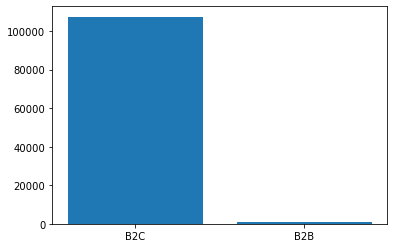

In [ ]:
plt.bar(['B2C','B2B'],df['B2B'].value_counts())
plt.show()

####  753 ORDERS WERE OF B2B i.e BUSINESS TO BUSINESS AND 107442 ORDERS WERE OF B2C i.e BUSINESS TO CONSUMERS

### **Problem Statement 3**

#### Streamline logistics and fulfillment processes by calculating average shipping time, and evaluating the percentage of orders fulfilled by Amazon vs Merchant.


#### **Average Shipping Time -**

##### AS WE KNOW, STANDARD  SHIPPING DAYS REQUIRES 2-7 BUSINESS DAYS, WHERE AS EXPEDITED SHIPPING DAYS REQIRES 2-3 BUSINESS DAYS

In [ ]:
df['ShipServiceLevel'].value_counts()

Expedited    77308
Standard     30887
Name: ShipServiceLevel, dtype: int64

##### AS WE CAN SEE, THE AVERAGE SHIPPING DAYS IS EXPEDITED i.e **2-3 DAYS** OR **48-72 hrs**

#### **Evaluating the percentage of orders fulfilled by Amazon vs Merchant**

In [ ]:
df['Fulfilment'].value_counts()

Amazon      78222
Merchant    29973
Name: Fulfilment, dtype: int64

In [ ]:
l1=list(df['Fulfilment'].value_counts().index)

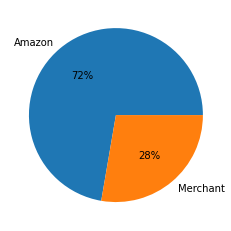

In [ ]:
plt.pie(df['Fulfilment'].value_counts(),labels =l1,autopct='%.0f%%')
plt.show()

##### WE CAN CLEARLY SEE THAT, THE AMAZON HAS TOTAL 72% ORDER FULFILMENT PERCENTAGE, WHEREAS MERCHANT HAS 28%

### **Problem Statement 4**
#### Enhance product management strategies by identifying popular product categories, and analyzing average quantity ordered.

##### **Popular Product Based On Category**

In [ ]:
df['Category'].value_counts()

Set              42298
kurta            41149
Western Dress    13175
Top               9299
Ethnic Dress       978
Blouse             804
Bottom             364
Saree              127
Dupatta              1
Name: Category, dtype: int64

##### AS PER THE POPULARITY, **SET** IS THE MOSTLY SOLD CATEGORY

In [ ]:
cat=df['Category'].value_counts()

In [ ]:
a={}
for i in cat.index:
    a[i]=df['Category'].value_counts()[i]/sum(df[df['Category']==i]['Qty'])

In [ ]:
pd.DataFrame(data=a.values(),index=a.keys(),columns=['AVG QTY']).sort_values(by='AVG QTY',ascending=False)

,AVG QTY
Dupatta,1.000000
Ethnic Dress,0.997959
Set,0.997406
Western Dress,0.997049
Top,0.996784
kurta,0.995548
Bottom,0.991826
Blouse,0.991369
Saree,0.976923


##### ABOVE IS THE AVERAGE QUANTITY WITH RESPECT TO THE CATEGORY, AND **WESTERN DRESS** AND **SET** HAVE HIGHEST QTY PER ORDER

### **Problem Statement 5**

#### Enhance customer satisfaction by analyzing return and cancellation rates, identifying problematic products or categories, and addressing quality issues.

#### **RETURN RATE**

In [ ]:
df['Status'].value_counts()

Shipped                          72614
Shipped - Delivered to Buyer     26554
Cancelled                         5239
Shipped - Returned to Seller      1847
Shipped - Picked Up                918
Pending                            583
Pending - Waiting for Pick Up      262
Shipped - Returning to Seller      130
Shipped - Out for Delivery          32
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            4
Shipped - Damaged                    1
Name: Status, dtype: int64

In [ ]:
return_orders=len(df[df['Status'].isin(['Shipped - Returned to Seller','Shipped - Returning to Seller'])])

In [ ]:
return_orders

1977

##### THERE ARE 1977 ORDERS WHICH ARE RETURNED TO SELLER OR RETURNED

In [ ]:
return_rate=return_orders/len(df)*100

In [ ]:
return_rate

1.8272563427145432

#### **CANCEL RATE**

In [ ]:
cancel_orders=len(df[df['Status'].isin(['Cancelled'])])

In [ ]:
cancel_rate=cancel_orders/len(df)*100

In [ ]:
cancel_rate

4.8421830953371225

##### ABOVE IS THE CANCEL RATE, WHICH IS OF 4%

#### **Problematic Products**

In [ ]:
df['Status'].value_counts().tail(1)

Shipped - Damaged    1
Name: Status, dtype: int64

#### AS WE CAN SEE THERE IS ONLY **1** PROBLEMATIC PRODUCT OBSERVED AMONG THE DATA

Thank you!